Indain Data set. Determine whether or not a patient will develop Diabetes within the next 5 years

In [1]:
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score

np.random.seed(42)

rom sklearn.preprocessing import LabelEncoder
import pandas as pd

#Reads the csv as a panda data fram
panda_df=pd.read_csv('votingrecords (1).csv', delimiter=',',header=None)

#Converts panda data frame to numpy array
data_2=panda_df.to_numpy()
encoder=LabelEncoder()
Y_voting=data_2[:,0:1]

#Reshapes the target variable in order to change target values to 0 or 1
Y_voting=np.reshape(Y_voting,-1)

#Changes Democrat to 0 and Republican to 1
encoder.fit(Y_voting)
encoded_y=encoder.transform(Y_voting)

#finds the shape of the array-17 columns
data_2.shape

#Changes 'N' to 0 and 'y' to 1
X_voting=data_2[:,1:17]
X_voting=np.reshape(X_voting,-1)
encoder.fit(X_voting)
encoder_x=encoder.transform(X_voting)
len(encoder_x)

#Reshapes the data so that both X and Y are the same lengths to run model
encoder_x=np.reshape(encoder_x,(232,16))
encoded_y=np.reshape(encoded_y,(232,1))





Using TensorFlow backend.


In [ ]:
#Creates the function to plot confusion matrices

from sklearn.metrics import confusion_matrix
import itertools


#Plot feautres of the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis-1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion Matrix w/o Normalization')
    print(cm)
    #Creates threshold to determine font color and labels each section of confusion matrix with their number 
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j]),
        horizontalaligment='center',
        color='white'if cm[i,j]>thresh else 'black'
    
    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Voting Record Data Set. Use past voting records to determine what political party the voter belongs to, i.e Democrat or Republican

In [5]:
#Creates the model I want to run the data through
voting_model=Sequential([Dense(8, activation='relu',input_dim=16),
    Dense(4,activation='relu'),
    Dense(2, activation='relu'),
    Dense(1,activation='sigmoid'),
])
    



In [4]:
#Compiles the data using adam optimizer and binary cross entropy as my loss function
#Fits the model using 100 epochs
voting_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
vote_history=voting_model.fit(encoder_x,encoded_y, epochs=100,verbose=0)




In [5]:
#Prints out Accuracy of the model
evaluation=voting_model.evaluate(encoder_x,encoded_y)
print('Model Accruracy @ 100 epochs:', round(evaluation[1]*100,1))

232/232 [==============================] - 0s 1ms/step
Model Accruracy @ 100 epochs: 97.0


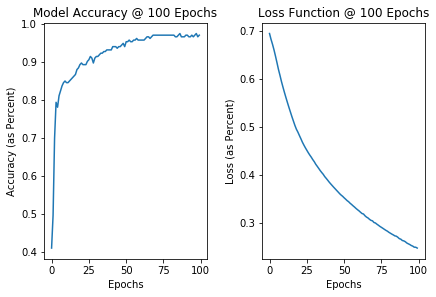

In [6]:
#Plots the accuracy and the loss of the model
plt.subplot(1,2,1)
plt.plot(vote_history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 100 Epochs')

plt.subplot(1,2,2)
plt.plot(vote_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 100 Epochs')
plt.tight_layout(pad=0.25)
plt.show()

Confusion Matrix w/o Normalization
[[120   1]
 [  4 107]]


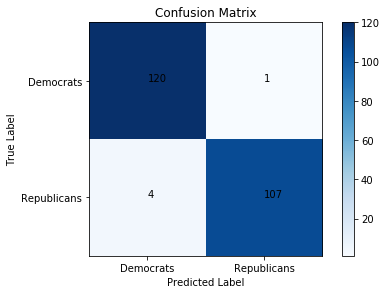

In [7]:
vote_predict=voting_model.predict_classes(encoder_x)
vote_cm=confusion_matrix(vote_predict,encoded_y)

cm_plot_labels=['Democrats','Republicans']
plot_confusion_matrix(vote_cm,cm_plot_labels,title='Confusion Matrix')

#Correctly Predicted 120 Democrats and 107 Republicans. Incorrectly predicted  4 Republicans as Democrats and 1 Republicans
#as Democrats

In [8]:
print('Precision Score for Neural Network is',precision_score(encoded_y,vote_predict))
print('Recall Score for Neural Network is:',recall_score(encoded_y,vote_predict))
print('Accuracy Socre Neural Network is :', accuracy_score(encoded_y,vote_predict))

Precision Score for Neural Network is 0.963963963963964
Recall Score for Neural Network is: 0.9907407407407407
Accuracy Socre Neural Network is : 0.978448275862069


In [7]:
#Split data into train and test samples to (hopefully) eliminate or reduce overfitting

from sklearn.model_selection import train_test_split

x_train,X_test,y_train,Y_test=train_test_split(encoder_x,encoded_y, test_size=.3,random_state=42)



In [6]:
#Compiles the data using adam optimizer and binary cross entropy as my loss function
#Fits the model using 100 epochs with a validation split of 10% that will help to reduce overfitting
voting_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
v_model=voting_model.fit(x_train,y_train, epochs=100,validation_split=.1,verbose=0)



In [6]:
#Prints out Accuracy of the model
evaluation=voting_model.evaluate(x_train,y_train)
print('Model Accruracy @ 100 epochs:', round(evaluation[1]*100,1))

162/162 [==============================] - 0s 142us/step
Model Accruracy @ 100 epochs: 96.3


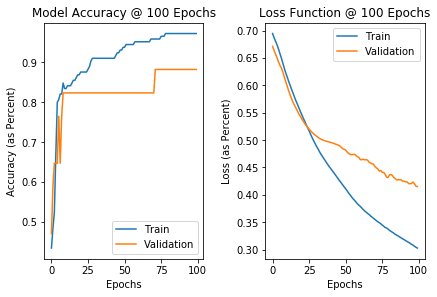

In [9]:
#Plots the accuracy and the loss of the model
plt.subplot(1,2,1)
plt.plot(v_model.history['accuracy'])
plt.plot(v_model.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 100 Epochs')
plt.legend(['Train','Validation'],loc='lower right')

plt.subplot(1,2,2)
plt.plot(v_model.history['loss'])
plt.plot(v_model.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 100 Epochs')
plt.legend(['Train','Validation'],loc='upper right')
plt.tight_layout(pad=0.25)
plt.show()

Confusion Matrix w/o Normalization
[[34  1]
 [ 2 33]]


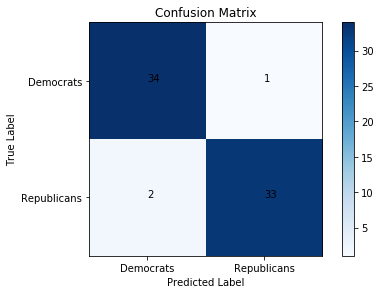

In [8]:
#Correctly Predicted 34 Democrats and 33 Republicans. Incorrectly predicted 1 Republicans as Democrats and 2 Republicans
#as Democrats
new_predict=voting_model.predict_classes(X_test)
vote_cm=confusion_matrix(new_predict,Y_test)

cm_plot_labels=['Democrats','Republicans']
plot_confusion_matrix(vote_cm,cm_plot_labels,title='Confusion Matrix')


In [9]:
print('Precision Score for Neural Network is',precision_score(Y_test,new_predict))
print('Recall Score for Neural Network is:',recall_score(Y_test,new_predict))
print('Accuracy Socre Neural Network is :', accuracy_score(Y_test,new_predict))

Precision Score for Neural Network is 0.9428571428571428
Recall Score for Neural Network is: 0.9705882352941176
Accuracy Socre Neural Network is : 0.9571428571428572


In [8]:
#Compiles the data using adam optimizer and binary cross entropy as my loss function
#Fits the model using 250 epochs with a validation data using X_test and Y_test that will help to reduce overfitting

voting_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
v_model_2=voting_model.fit(x_train,y_train, epochs=250,validation_data=(X_test,Y_test),verbose=0)

In [7]:
#Prints out Accuracy of the model
evaluation=voting_model.evaluate(x_train,y_train)
print('Model Accruracy @ 250 epochs:', round(evaluation[1]*100,1))

162/162 [==============================] - 0s 135us/step
Model Accruracy @ 250 epochs: 98.8


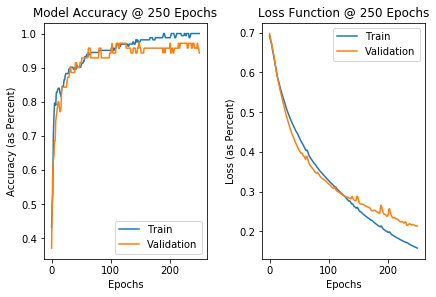

In [7]:
#Plots the accuracy and the loss of the model
plt.subplot(1,2,1)
plt.plot(v_model_2.history['accuracy'])
plt.plot(v_model_2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 250 Epochs')
plt.legend(['Train','Validation'],loc='lower right')

plt.subplot(1,2,2)
plt.plot(v_model_2.history['loss'])
plt.plot(v_model_2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 250 Epochs')
plt.legend(['Train','Validation'],loc='upper right')
plt.tight_layout(pad=0.25)
plt.show()

Confusion Matrix w/o Normalization
[[35  3]
 [ 1 31]]


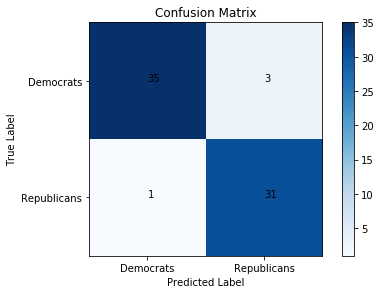

In [9]:
#Correctly Predicted 35 Democrats and 31 Republicans. Incorrectly predicted 3 Republicans as Democrats and 1 Republicans
#as Democrats
new_predict_2=voting_model.predict_classes(X_test)
vote_cm=confusion_matrix(new_predict_2,Y_test)

cm_plot_labels=['Democrats','Republicans']
plot_confusion_matrix(vote_cm,cm_plot_labels,title='Confusion Matrix')

In [10]:
print('Precision Score for Neural Network is',precision_score(Y_test,new_predict_2))
print('Recall Score for Neural Network is:',recall_score(Y_test,new_predict_2))
print('Accuracy Socre Neural Network is :', accuracy_score(Y_test,new_predict_2))

Precision Score for Neural Network is 0.96875
Recall Score for Neural Network is: 0.9117647058823529
Accuracy Socre Neural Network is : 0.9428571428571428
